# Repaso (Módulo 2)
> El tema principal en este módulo fueron simulaciones Montecarlo. Al finalizar este módulo, se espera que ustedes tengan las siguientes competencias
> - Evaluar integrales (o encontrar áreas) numéricamente mendiante métodos Montecarlo.
> - Poder replicar fractales aleatorios símples (como los de Barnsley), dadas las características del mismo.
> - Realizar evaluaciones de probabilidad precio-umbral.

## Ejemplo 1. Evaluación numérica de integrales utilizando Montecarlo

- En la clase de evaluación de integrales numéricas por montecarlo vimos dos tipos de evaluación de integrales.
- El tipo 1 se basaba en la definición de valor promedio de una función.
- El tipo 2 se basaba en probabilidades y una variable aleatoria de bernoulli (para encontrar áreas).

En clase desarrollamos funciones para la evaluación de integrales con ambos métodos (explicar porqué la segunda se puede ver como una integral). Las funciones son las siguientes:

In [1]:
# Importamos librerías
import numpy as np
import pandas as pd
import random

In [2]:
def int_montecarlo1(f, a, b, N):
    # Evaluación numérica de integrales por Montecarlo tipo 1
    # f=f(x) es la función a integrar (debe ser declarada previamente) que devuelve para cada x su valor imagen,
    # a y b son los límites inferior y superior del intervalo donde se integrará la función, y N es el número
    # de puntos con que se aproximará.
    return (b-a)/N*np.sum(f(np.random.uniform(a, b, N)))

In [3]:
def int_montecarlo2(region, a1, b1, a2, b2, N):
    # Evaluación numérica de integrales por Montecarlo tipo 2
    # region=region(x,y) retorna True si la coordenada (x,y) pertenece a la región a integrar y False de lo 
    # contrario , a1, b1, a2, b2 son los límites del rectángulo que contiene la región, y N es el número de 
    # puntos con que se aproximará.
    A_R = (b1-a1)*(b2-a2)
    x = np.random.uniform(a1, b1, N.astype(int))
    y = np.random.uniform(a2, b2, N.astype(int))
    return A_R*np.sum(region(x,y))/N

Considere las funciones $f_1(x)=\sqrt{1+x^{4}}$, $f_2(x)=\ln(\ln x)$, $f_3(x)=\frac {1}{\ln x}$, $f_4(x)=e^{e^{x}}$, $f_5(x)=e^{-{\frac {x^{2}}{2}}}$ y $f_6(x)=\sin(x^{2})$.

Utilizar las funciones anteriores para realizar la evaluación numérica de las integrales de las funciones anteriores en el intervalo $(4,5)$. Poner los resultados en una tabla cuyas filas correspondan a la cantidad de términos utilizados en la aproximación (usar 10, 100, 1000, 10000 y 100000 términos) y cuyas columnas correspondan a las funciones.

Hacer una tabla por cada método.

¿Se pueden ver diferencias notables en la velocidad de convergencia de los métodos?

In [4]:
def f1(x):
    return np.sqrt(x**4+1)
def f2(x):
    return np.log(np.log(x))
def f3(x):
    return 1/np.log(x)
def f4(x):
    return np.exp(np.exp(x))
def f5(x):
    return np.exp(-x**2/2)
def f6(x):
    return np.sin(x**2)

In [5]:
a, b = 4, 5
N = np.logspace(1,5,5)
tabla_tipo1 = pd.DataFrame(columns=['$f_1(x)$','$f_2(x)$','$f_3(x)$','$f_4(x)$','$f_5(x)$','$f_6(x)$'], index=N)
tabla_tipo1.index.name = 'Cantidad de términos'

for n in N:
    n = n.astype('int')
    tabla_tipo1.loc[n, '$f_1(x)$'] = int_montecarlo1(f1, a, b, n)
    tabla_tipo1.loc[n, '$f_2(x)$'] = int_montecarlo1(f2, a, b, n)
    tabla_tipo1.loc[n, '$f_3(x)$'] = int_montecarlo1(f3, a, b, n)
    tabla_tipo1.loc[n, '$f_4(x)$'] = int_montecarlo1(f4, a, b, n)
    tabla_tipo1.loc[n, '$f_5(x)$'] = int_montecarlo1(f5, a, b, n)
    tabla_tipo1.loc[n, '$f_6(x)$'] = int_montecarlo1(f6, a, b, n)
    
tabla_tipo1

,$f_1(x)$,$f_2(x)$,$f_3(x)$,$f_4(x)$,$f_5(x)$,$f_6(x)$
Cantidad de términos,,,,,,
10.0,19.927,0.406448,0.652435,2.63575e+63,8.47016e-05,-0.348062
100.0,20.276,0.401665,0.664148,3.22917e+62,8.49437e-05,-0.244641
1000.0,20.3799,0.406287,0.665161,2.08226e+62,7.93475e-05,-0.230262
10000.0,20.3387,0.40588,0.666922,2.17228e+62,7.86024e-05,-0.21228
100000.0,20.3438,0.405906,0.666873,1.90725e+62,7.85913e-05,-0.220096


In [6]:
def region1(x,y):
    return y<=f1(x)
def region2(x,y):
    return y<=f2(x)
def region3(x,y):
    return y<=f3(x)
def region4(x,y):
    return y<=f4(x)
def region5(x,y):
    return y<=f5(x)

In [7]:
a1, b1 = 4, 5
a2 = 0
b2 = [26, 0.5, 0.8, 2.86e+64, 0.00036]
N = np.logspace(1,5,5)
tabla_tipo2 = pd.DataFrame(columns=['$f_1(x)$','$f_2(x)$','$f_3(x)$','$f_4(x)$','$f_5(x)$'], index=N)
tabla_tipo2.index.name = 'Cantidad de términos'

for n in N:
    n = n.astype('int')
    tabla_tipo2.loc[n, '$f_1(x)$'] = int_montecarlo2(region1, a1, b1, a2, b2[0], n)
    tabla_tipo2.loc[n, '$f_2(x)$'] = int_montecarlo2(region2, a1, b1, a2, b2[1], n)
    tabla_tipo2.loc[n, '$f_3(x)$'] = int_montecarlo2(region3, a1, b1, a2, b2[2], n)
    tabla_tipo2.loc[n, '$f_4(x)$'] = int_montecarlo2(region4, a1, b1, a2, b2[3], n)
    tabla_tipo2.loc[n, '$f_5(x)$'] = int_montecarlo2(region5, a1, b1, a2, b2[4], n)

tabla_tipo2

,$f_1(x)$,$f_2(x)$,$f_3(x)$,$f_4(x)$,$f_5(x)$
Cantidad de términos,,,,,
10.0,20.8,0.4,0.64,0,3.6e-05
100.0,20.02,0.385,0.68,2.86e+62,6.12e-05
1000.0,20.15,0.404,0.6736,2.574e+62,7.092e-05
10000.0,20.098,0.4065,0.66736,2.2308e+62,7.8012e-05
100000.0,20.3668,0.406575,0.665272,1.73602e+62,7.77312e-05


In [8]:
tabla_tipo1

,$f_1(x)$,$f_2(x)$,$f_3(x)$,$f_4(x)$,$f_5(x)$,$f_6(x)$
Cantidad de términos,,,,,,
10.0,19.927,0.406448,0.652435,2.63575e+63,8.47016e-05,-0.348062
100.0,20.276,0.401665,0.664148,3.22917e+62,8.49437e-05,-0.244641
1000.0,20.3799,0.406287,0.665161,2.08226e+62,7.93475e-05,-0.230262
10000.0,20.3387,0.40588,0.666922,2.17228e+62,7.86024e-05,-0.21228
100000.0,20.3438,0.405906,0.666873,1.90725e+62,7.85913e-05,-0.220096


## Ejemplo 2. Fractal aleatorio tipo Barnsley

- En la clase de fractales aleatorios vimos que el fractal helecho de Barnsley se generaba a través de cuatro transformaciones afines que se elegían con cierta probabilidad.
- Vimos que este helecho representaba de manera muy aproximada helechos reales.
- Vimos que modificando parámetros de la tabla, se podían generar mutaciones de el helecho.

Pues bien, usando la misma idea de transformaciones afines que se escogen con cierta probabilidad, se pueden generar una infinidad inimaginable de fractales. Incluso, se pueden generar fractales aleatorios que poseen un atractor determinístico (¿Qué es esto?).

Como en la clase de fractales, repliquemos el fractal tipo Barnsley descrito por la siguiente tabla...

**Referencia:**
- Barnsley, Michael F. *Fractals Everywhere: New Edition*, ISBN: 9780486320342.

In [9]:
import pandas as pd
import numpy as np

In [10]:
i = np.arange(4)

df = pd.DataFrame(index=i,columns=['$a_i$', '$b_i$', '$c_i$', '$d_i$', '$e_i$', '$f_i$', '$p_i$'], dtype='float')
df.index.name = "$i$"

df['$a_i$'] = [0.5, 0.5, 0.5, 0.5]
df['$b_i$'] = [0.0, 0.0, 0.0, 0.0]
df['$c_i$'] = [0.0, 0.0, 0.0, 0.0]
df['$d_i$'] = [0.5, 0.5, 0.5, 0.5]
df['$e_i$'] = [1.0, 50.0, 1.0, 50.0]
df['$f_i$'] = [1.0, 1.0, 50.0, 50.0]
df['$p_i$'] = [0.1, 0.2, 0.3, 0.4]

df.round(2)

,$a_i$,$b_i$,$c_i$,$d_i$,$e_i$,$f_i$,$p_i$
$i$,,,,,,,
0,0.5,0.0,0.0,0.5,1.0,1.0,0.1
1,0.5,0.0,0.0,0.5,50.0,1.0,0.2
2,0.5,0.0,0.0,0.5,1.0,50.0,0.3
3,0.5,0.0,0.0,0.5,50.0,50.0,0.4


### Solución

In [11]:
mat_barnsley = np.array([[0.5, 0.0, 0.0, 0.5, 1.0, 1.0, 0.1], 
                        [0.5, 0.0, 0.0, 0.5, 50.0, 1.0, 0.2],
                        [0.5, 0.0, 0.0, 0.5, 1.0, 50.0, 0.3],
                        [0.5, 0.0, 0.0, 0.5, 50.0, 50.0, 0.4]])
mat_barnsley

array([[  0.5,   0. ,   0. ,   0.5,   1. ,   1. ,   0.1],
       [  0.5,   0. ,   0. ,   0.5,  50. ,   1. ,   0.2],
       [  0.5,   0. ,   0. ,   0.5,   1. ,  50. ,   0.3],
       [  0.5,   0. ,   0. ,   0.5,  50. ,  50. ,   0.4]])

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
x, y = [0.0], [0.0]

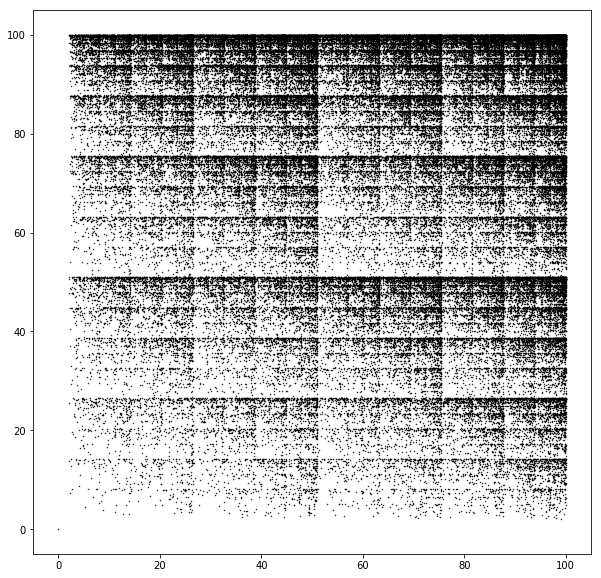

In [17]:
x, y = [0.0], [0.0]
for k in range(100000):
    p = random.random()
    if p <= mat_barnsley[0,6]:
        i = 0
    elif p <= mat_barnsley[0,6]+mat_barnsley[1,6]:
        i = 1
    elif p <= mat_barnsley[0,6]+mat_barnsley[1,6]+mat_barnsley[2,6]:
        i = 2
    else:
        i = 3
        
    x.append(mat_barnsley[i,0]*x[-1]+mat_barnsley[i,1]*y[-1]+mat_barnsley[i,4])
    y.append(mat_barnsley[i,2]*x[-2]+mat_barnsley[i,3]*y[-1]+mat_barnsley[i,5])

plt.figure(figsize=(10,10))
plt.scatter(x,y, c='k', s = 0.2)
plt.show()

## Ejemplo 3. Probabilidad Precio-Umbral

En las últimas clases vimos una aplicación de simulación montecarlo. Consistía en descargar datos históricos de precio de cierre de acciones de alguna compañía, proyectar esos precios y sacar la probabilidad de que los precios en el siguiente año sobrepasaran cierto precio umbral.

En este ejemplo evaluaremos dos compañías con tendencias más o menos similares (Apple y Microsoft) veremos cuál tiene más probabilidades de darnos un interés deseado.

Además, descargaremos los datos del presente año (2017) para ver si el análisis concuerda.

Las funciones que desarrollamos en la clase del martes son:

In [18]:
# Importamos librerías
import numpy as np
import pandas as pd
import pandas_datareader as data
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
# Función que creamos en clase para bajar datos
def load_adj_close(ticker, data_source, start_date, end_date):
    panel_data = data.DataReader(ticker, data_source, start_date, end_date)
    closes = panel_data.loc['Adj Close']
    all_weekdays = pd.date_range(start=start_date, end=end_date)
    closes = closes.reindex(all_weekdays)
    closes = closes.fillna(method='ffill')
    return closes

# Función que devuelve rendimientos diarios, media y desviación estándar
def mu_std_daily_ret(closes):
    daily_returns = (np.log(closes/closes.shift(1)))[1:]
    mu = daily_returns.mean().values
    sigma = daily_returns.std().values
    return daily_returns, mu, sigma

# Función que simula varios escenarios de rendimientos diarios
def daily_ret_sim(mu, sigma, ndays, ntraj, start_date):
    dates = pd.date_range(start=start_date,periods=ndays)
    return pd.DataFrame(sigma*np.random.randn(ndays, ntraj)+mu, index = dates)

# Función de proyección de precios
def closes_proj(simret, closes):
    return (closes.iloc[-1,:].values[0])*np.exp(simret.cumsum())

Descarguemos datos para Apple y Microsoft en el 2016

In [20]:
# Descargamos datos de microsoft en el 2016
ticker = ['AAPL','MSFT']
data_source = 'yahoo'
start_date = '2016-01-04'
end_date = '2016-12-31'
closes = load_adj_close(ticker, data_source, start_date, end_date)

In [22]:
closes

,AAPL,MSFT
2016-01-04,101.790649,52.433533
2016-01-05,99.239845,52.672737
2016-01-06,97.297760,51.715916
2016-01-07,93.191338,49.917099
2016-01-08,93.684120,50.070198
2016-01-09,93.684120,50.070198
2016-01-10,93.684120,50.070198
2016-01-11,95.201073,50.041489
2016-01-12,96.582756,50.500759
2016-01-13,94.099594,49.409988


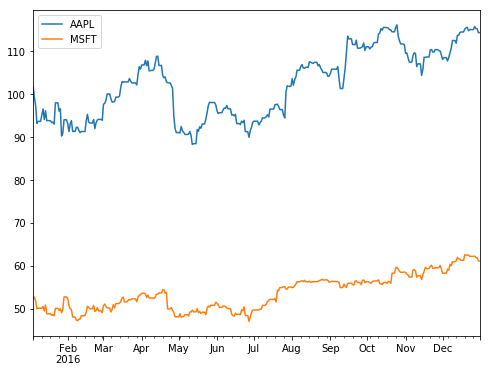

In [23]:
# Grafiquemos
closes.plot(figsize=(8,6));

Calculamos los rendimientos diarios junto con sus características estadísticas

In [24]:
# Calculamos con la función anterior
daily_returns, mu, sigma = mu_std_daily_ret(closes)
mu, sigma

(array([ 0.00032253,  0.00042202]), array([ 0.01227873,  0.01191539]))

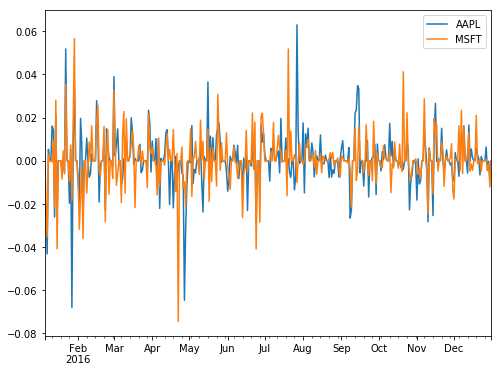

In [25]:
# Son similares
daily_returns.plot(figsize=(8,6));

In [26]:
mu_AAPL, sigma_AAPL = mu[0], sigma[0]
mu_MSFT, sigma_MSFT = mu[1], sigma[1]

Simulamos 100 escenarios de rendimientos diarios para el 2017 (para cada una de las empresas)

In [27]:
# Simulamos 100 escenarios para todo el 2017
ndays = 360
ntraj = 100
start_date = '2017-01-01'
simret_AAPL = daily_ret_sim(mu_AAPL, sigma_AAPL, ndays, ntraj, start_date)
simret_MSFT = daily_ret_sim(mu_MSFT, sigma_MSFT, ndays, ntraj, start_date)

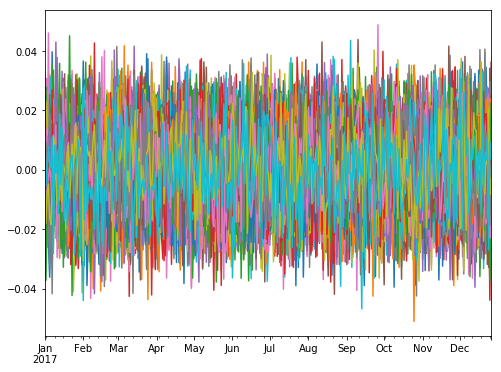

In [30]:
simret_AAPL.plot(figsize=(8,6), legend = False);

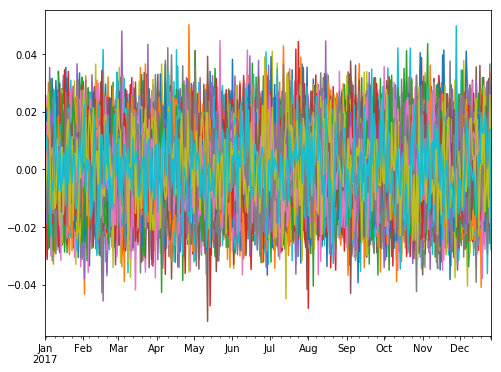

In [31]:
simret_MSFT.plot(figsize=(8,6), legend = False);

Calculamos los precios con base en los rendimientos simulados

In [38]:
# Proyección de precios y concatenación con precios de 2016
closes_AAPL = closes_proj(simret_AAPL, pd.DataFrame({'AAPL':closes['AAPL']}, index = closes.index))
closes_MSFT = closes_proj(simret_MSFT, pd.DataFrame({'MSFT':closes['MSFT']}, index = closes.index))

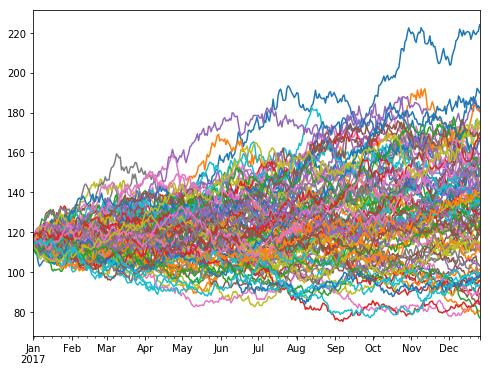

In [41]:
closes_AAPL.plot(figsize=(8,6), legend=False);

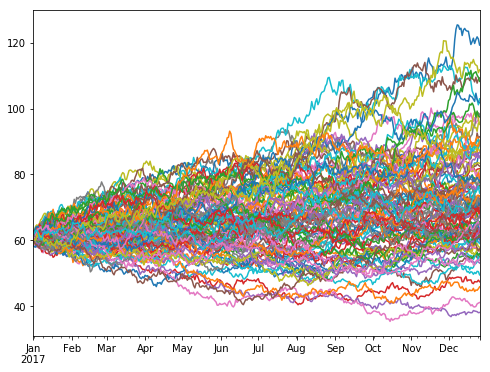

In [42]:
closes_MSFT.plot(figsize=(8,6), legend=False);

Calculamos las probabilidades con base en una tasa de interés anual deseada

In [51]:
# Cálculo de umbral con base en una tasa de interés anual deseada
tasa_anual = 0.1
K_AAPL, K_MSFT = (1+tasa_anual)*closes.iloc[-1,:]

In [52]:
K_AAPL, K_MSFT

(125.83642610000001, 67.196860500000014)

In [53]:
# Función para calcular probabilidades diarias de que el precio sea mayor que un umbral
def daily_prob(simdata, K):
    strike = pd.DataFrame(K*np.ones(simdata.shape).reshape(simdata.shape), index = simdata.index)
    return (simdata>strike).T.sum()/simdata.shape[1]

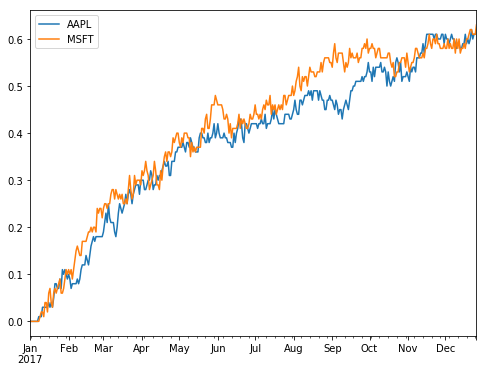

In [54]:
prob = pd.DataFrame({'AAPL':daily_prob(closes_AAPL, K_AAPL), 'MSFT': daily_prob(closes_MSFT, K_MSFT)}, index = closes_AAPL.index)
prob.plot(figsize=(8,6));

In [55]:
prob

,AAPL,MSFT
2017-01-01,0.00,0.00
2017-01-02,0.00,0.00
2017-01-03,0.00,0.00
2017-01-04,0.00,0.00
2017-01-05,0.00,0.00
2017-01-06,0.00,0.00
2017-01-07,0.00,0.00
2017-01-08,0.01,0.00
2017-01-09,0.01,0.01
2017-01-10,0.01,0.02


Finalmente, veamos los datos reales del 2017 para ver que tan acertados fueron nuestros análisis...

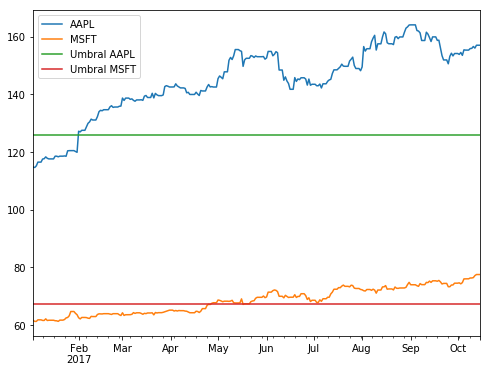

In [56]:
ticker = ['AAPL','MSFT']
data_source = 'yahoo'
start_date = '2017-01-03'
end_date = '2017-10-15'
closes_actuales = load_adj_close(ticker, data_source, start_date, end_date)

umbral = pd.DataFrame({'Umbral AAPL':K_AAPL*np.ones(closes_actuales.shape[0]), 'Umbral MSFT':K_MSFT*np.ones(closes_actuales.shape[0])}, index= closes_actuales.index)

comparacion = pd.concat((closes_actuales.T, umbral.T)).T

comparacion.plot(figsize=(8,6));

# Recordar que deben subir a moodle un notebook con el nombre, intro y objetivos del proyecto.

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Esteban Jiménez Rodríguez.
</footer>